<a href="https://colab.research.google.com/github/Finn-HPI/ChargingParkPlacement/blob/main/SonicThinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup


In [1]:
!apt-get update > /dev/null

In [2]:
# enables music21 to render images of musical notes
!apt-get install lilypond > /dev/null
!lilypond --version

Extracting templates from packages: 100%
GNU LilyPond 2.22.1

Copyright (c) 1996--2021 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [3]:
# this renderer actually shows tuplets properly
!sudo apt-get install musescore3 > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 56.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [4]:
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!fluidsynth --version

FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

FluidSynth executable version 2.2.5
Sample type=double


In [5]:
!pip install --upgrade music21 > /dev/null

In [6]:
import music21
from IPython.display import Image, Audio

In [7]:
music21.__version__

'9.1.0'

In [8]:
display?

In [9]:
def show(music):
  # display(Image(str(music.write('lily.png'))))
  music.show()

def play(music):
  show(music)
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  print()
  display(Audio(filename=filename.with_suffix(filename.suffix + '.wav')))

### Test

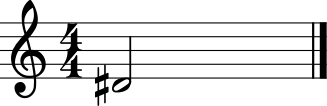

In [10]:
s = music21.stream.Stream()
s.append(music21.instrument.Flute())
n = music21.note.Note('D#4')
n.duration.type = 'half'
s.append(n)
play(s)

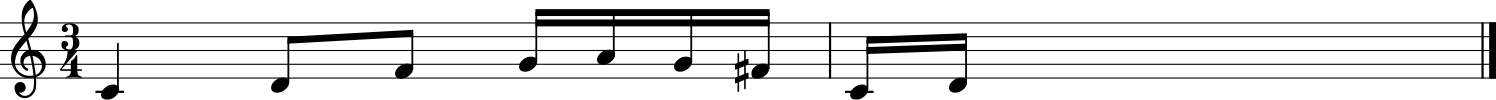

In [11]:
littleMelody = music21.converter.parse('tinynotation: 3/4 c4 d8 f g16 a g f# c d')
littleMelody.insert(0, music21.instrument.Banjo())
play(littleMelody)

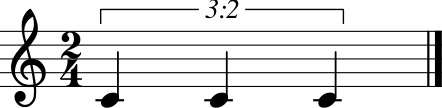

In [13]:
n = music21.note.Note()
n.duration = music21.duration.Duration(2.0/3.0)
n.duration.tuplets[0].tupletNormalShow = 'number'
s = music21.stream.Stream()
s.repeatAppend(n, 3)
s.insert(0, music21.meter.TimeSignature('2/4'))
s.show()

### Sonification: Bitcoin Stock Market Price (2012-2021)

In [40]:
import numpy as np
import pandas as pd
from io import StringIO

In [113]:
# Generated using the following using the Bitcoin Historical Data Set:
# (https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)

# df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
# df2 = df[['Timestamp', 'Weighted_Price']]
# df2.dropna(subset=['Weighted_Price'], inplace=True)

# df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], unit='s')
# df2['Year'] = df2['Timestamp'].dt.year
# df2['Month'] = df2['Timestamp'].dt.month

# grouped_df = df2.groupby(['Year', 'Month'])['Weighted_Price'].mean().reset_index()

# grouped_df.rename(columns={'Weighted_Price': 'Price'}, inplace=True)
# grouped_df.to_csv("bitcoin_price_by_year_and_month_2012_to_2021.csv")

bitcoin_csv_string = """,Year,Month,Price
1,2012,1,6.345954835435928
2,2012,2,5.22844298097383
3,2012,3,4.984397360075211
4,2012,4,4.995090718708684
5,2012,5,5.046847559921347
6,2012,6,6.047197571831958
7,2012,7,7.907613306313134
8,2012,8,10.984669770420153
9,2012,9,11.435691845594365
10,2012,10,11.586088544128318
11,2012,11,11.307918536370321
12,2012,12,13.167810684764216
13,2013,1,15.806889588424562
14,2013,2,26.805143085886183
15,2013,3,60.49568098476893
16,2013,4,127.48148456031836
17,2013,5,117.78029336918038
18,2013,6,106.52548150961384
19,2013,7,85.32609283353122
20,2013,8,104.6002915038288
21,2013,9,124.96623962639923
22,2013,10,153.7067767692808
23,2013,11,532.9418444212014
24,2013,12,795.1462589620107
25,2014,1,820.0977757781487
26,2014,2,657.5120464293043
27,2014,3,591.4750083825329
28,2014,4,461.2922036525237
29,2014,5,490.38954887379987
30,2014,6,613.7050891391681
31,2014,7,617.7769044009877
32,2014,8,532.9584017279029
33,2014,9,442.9265776684086
34,2014,10,362.71021397612304
35,2014,11,367.4784178423732
36,2014,12,342.30694244057696
37,2015,1,243.4967625333525
38,2015,2,233.6478401402417
39,2015,3,268.14881471683196
40,2015,4,233.5243260596484
41,2015,5,236.4709166142602
42,2015,6,237.7204481436838
43,2015,7,279.0767166457769
44,2015,8,250.82073144372958
45,2015,9,233.60724330606615
46,2015,10,267.95476182678453
47,2015,11,350.3635929094731
48,2015,12,422.0907636275814
49,2016,1,410.2162910103212
50,2016,2,401.73231961594803
51,2016,3,415.13654173448987
52,2016,4,431.3154437418594
53,2016,5,462.0881230065893
54,2016,6,642.7392999620101
55,2016,7,660.439431869193
56,2016,8,578.0624207930946
57,2016,9,603.0903280430344
58,2016,10,641.0369158535709
59,2016,11,723.1940338336184
60,2016,12,826.6988332431787
61,2017,1,908.1518059345707
62,2017,2,1060.6621871995653
63,2017,3,1128.9632714078775
64,2017,4,1208.9928610329048
65,2017,5,1885.190124862825
66,2017,6,2619.194431853366
67,2017,7,2491.2714880921635
68,2017,8,3834.673639973033
69,2017,9,4085.751828553139
70,2017,10,5293.800260907651
71,2017,11,7754.6252293079315
72,2017,12,14840.894239025334
73,2018,1,12894.950040362306
74,2018,2,9389.69604610542
75,2018,3,9023.731019708848
76,2018,4,7985.222523823804
77,2018,5,8439.758860433272
78,2018,6,6783.39008043244
79,2018,7,7096.708054606227
80,2018,8,6693.230559927898
81,2018,9,6586.987311222572
82,2018,10,6416.713229952528
83,2018,11,5321.281996677452
84,2018,12,3672.419305691004
85,2019,1,3659.467919257476
86,2019,2,3653.6386765432676
87,2019,3,3919.370871566865
88,2019,4,5139.112145026903
89,2019,5,7234.325315315042
90,2019,6,9361.78747180273
91,2019,7,10671.368500680377
92,2019,8,10617.966132586154
93,2019,9,9786.434234730532
94,2019,10,8368.913102606746
95,2019,11,8336.599600199279
96,2019,12,7240.856313659875
97,2020,1,8325.103326131071
98,2020,2,9647.50224861023
99,2020,3,6935.509450632461
100,2020,4,7182.971320503074
101,2020,5,9236.147949703558
102,2020,6,9459.783762030695
103,2020,7,9558.816689964928
104,2020,8,11637.963221707902
105,2020,9,10656.147578635138
106,2020,10,11844.14198736644
107,2020,11,16535.990324883092
108,2020,12,21811.782846743146
"""

<Axes: >

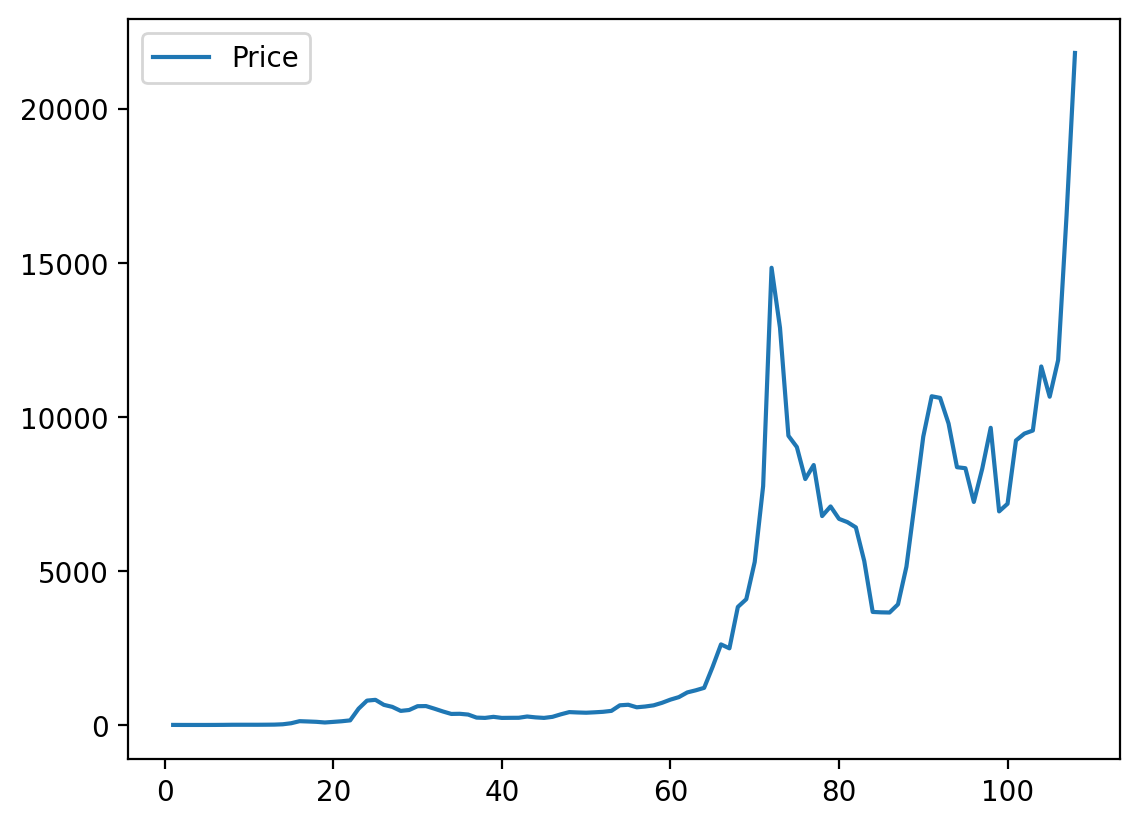

In [114]:
df = pd.read_csv(StringIO(bitcoin_csv_string), index_col=0)
df.plot.line(y=["Price"])

In [44]:
from music21.stream import Stream
from music21 import stream

from music21.note import Note
from music21.note import Rest
from music21.duration import Duration
from music21 import instrument
from music21.chord import Chord

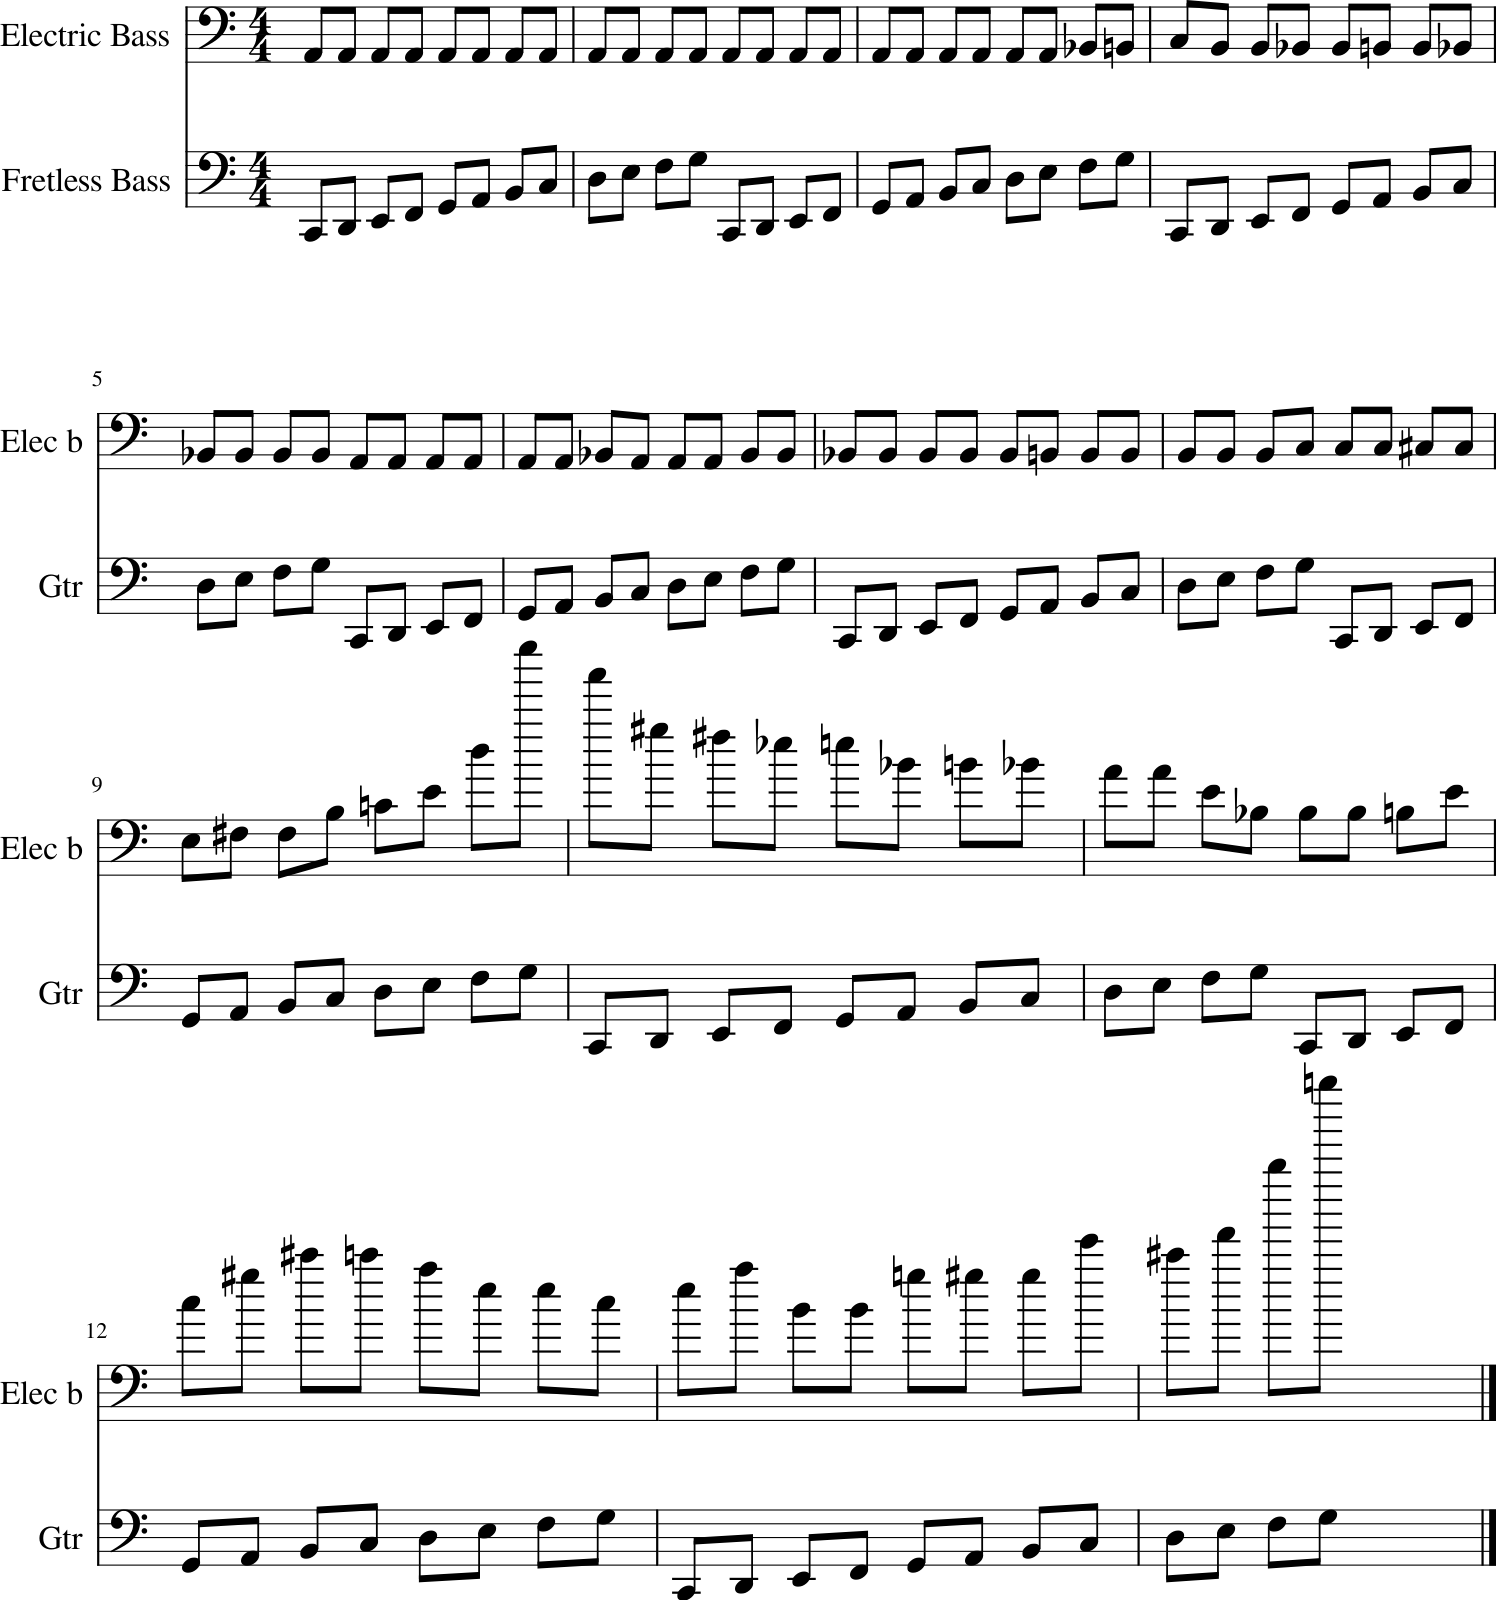

In [129]:
note_of_length = lambda n, d: Rest(quarterLength=d) if n == 0 else Note(n, quarterLength=d)


ostinato = stream.Part([music21.clef.BassClef(), instrument.FretlessBass()])

ns = [note_of_length(n,d) for n,d in [('c2', 0.5), ('d2', 0.5), ('e2', 0.5),
  ('f2', 0.5), ("g2", 0.5), ("a2", 0.5), ("b2", 0.5), ("c3", 0.5), ("d3", 0.5), ("e3", 0.5), ("f3", 0.5),  ("g3", 0.5)]]

bitcoin_values = df["Price"].to_numpy()

# bug that clef is added after first repeatAppend unless already appended
ostinato.append(ns)
ostinato.repeatAppend(Stream(ns), 8)

# split melody on bar lines and add ties
ostinato.makeMeasures(inPlace=True)
ostinato.makeTies(inPlace=True)

# Create a Music21 stream to hold the sonification
sonification_stream = stream.Part([instrument.ElectricBass()])

# Define some basic parameters for the sonification
min_pitch = 45  # lowest MIDI note
max_pitch = 127  # highest MIDI note
min_value = min(bitcoin_values)
max_value = max(bitcoin_values)

# Map the data values to the pitch range
data_range = max_value - min_value
pitch_range = max_pitch - min_pitch

# Create a measure for each data point
for value in bitcoin_values:
    # Calculate the pitch for this data point based on its value
    pitch_value = int((value - min_value) / data_range * pitch_range) + min_pitch
    note_obj = Note(quarterLength=0.5)
    note_obj.pitch.midi = pitch_value

    # Add a quarter note with the pitch representing the data point to the sonification stream
    sonification_stream.append(note_obj)

# Add a final rest to indicate the end of the sonification
# sonification_stream.append(Rest(quarterLength=4.0))

sonification_stream.makeMeasures(inPlace=True)
sonification_stream.makeTies(inPlace=True)


output = stream.Score(music21.tempo.MetronomeMark(number=130))
output.insert(0, sonification_stream)
output.insert(0, ostinato)
play(output)

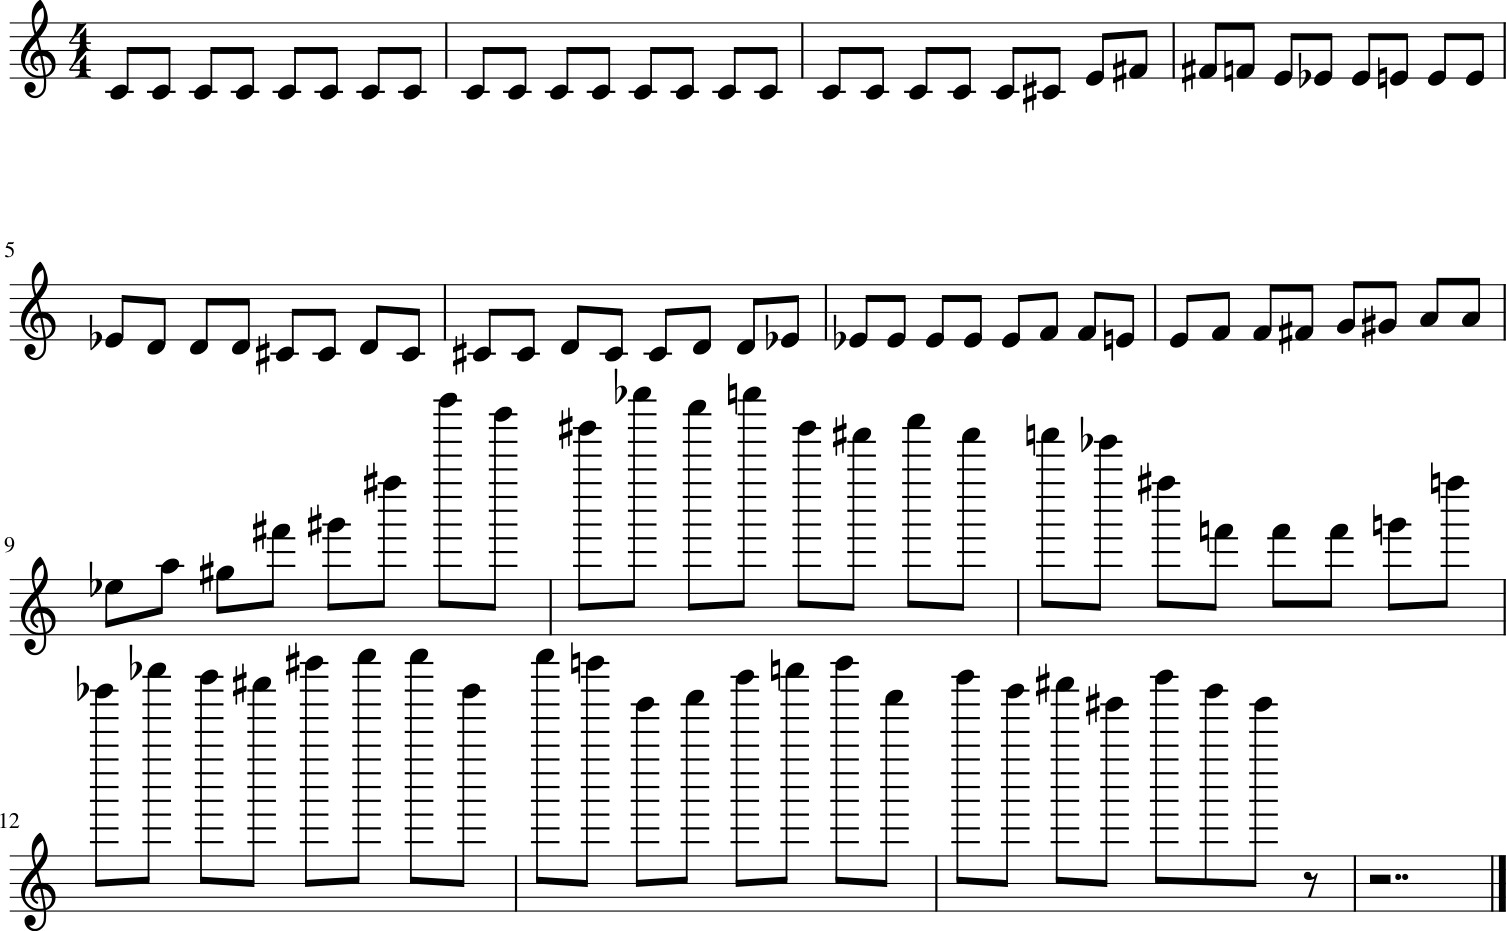

In [111]:
def sonify_time_series(data):
    # Create a Music21 stream to hold the sonification
    sonification_stream = stream.Stream()

    # Define some basic parameters for the sonification
    min_pitch = 60  # MIDI note number (C4)
    max_pitch = 500  # MIDI note number (C6)
    min_value = min(data)
    max_value = max(data)

    # Map the data values to the pitch range
    data_range = max_value - min_value
    pitch_range = max_pitch - min_pitch

    # Create a measure for each data point
    for value in data:
        # Calculate the pitch for this data point based on its value
        pitch_value = int((value - min_value) / data_range * pitch_range) + min_pitch
        note_obj = Note(quarterLength=0.5)
        note_obj.pitch.midi = pitch_value

        # Add a quarter note with the pitch representing the data point to the sonification stream
        sonification_stream.append(note_obj)

    # Add a final rest to indicate the end of the sonification
    sonification_stream.append(Rest(quarterLength=4.0))

    return sonification_stream

# Example time series data (replace this with your actual data)
time_series_data = df["Price"].to_numpy()

# Generate the sonification for the time series data
sonification = sonify_time_series(time_series_data)

# Show the music21 notation
play(sonification)

array([6.34595484e+00, 5.22844298e+00, 4.98439736e+00, 4.99509072e+00,
       5.04684756e+00, 6.04719757e+00, 7.90761331e+00, 1.09846698e+01,
       1.14356918e+01, 1.15860885e+01, 1.13079185e+01, 1.31678107e+01,
       1.58068896e+01, 2.68051431e+01, 6.04956810e+01, 1.27481485e+02,
       1.17780293e+02, 1.06525482e+02, 8.53260928e+01, 1.04600292e+02,
       1.24966240e+02, 1.53706777e+02, 5.32941844e+02, 7.95146259e+02,
       8.20097776e+02, 6.57512046e+02, 5.91475008e+02, 4.61292204e+02,
       4.90389549e+02, 6.13705089e+02, 6.17776904e+02, 5.32958402e+02,
       4.42926578e+02, 3.62710214e+02, 3.67478418e+02, 3.42306942e+02,
       2.43496763e+02, 2.33647840e+02, 2.68148815e+02, 2.33524326e+02,
       2.36470917e+02, 2.37720448e+02, 2.79076717e+02, 2.50820731e+02,
       2.33607243e+02, 2.67954762e+02, 3.50363593e+02, 4.22090764e+02,
       4.10216291e+02, 4.01732320e+02, 4.15136542e+02, 4.31315444e+02,
       4.62088123e+02, 6.42739300e+02, 6.60439432e+02, 5.78062421e+02,
      